Drawing base-bar for 5s  2S1/2 at 0.0 0.0
Drawing base-bar for 5p  2P1/2 at -0.5 22200.0
Drawing base-bar for 5p  2P3/2 at 0.5 26010.0
Drawing base-bar for 4d  2D3/2 at 1.0 13034.0
Drawing base-bar for 4d  2D5/2 at 2.0 16344.0


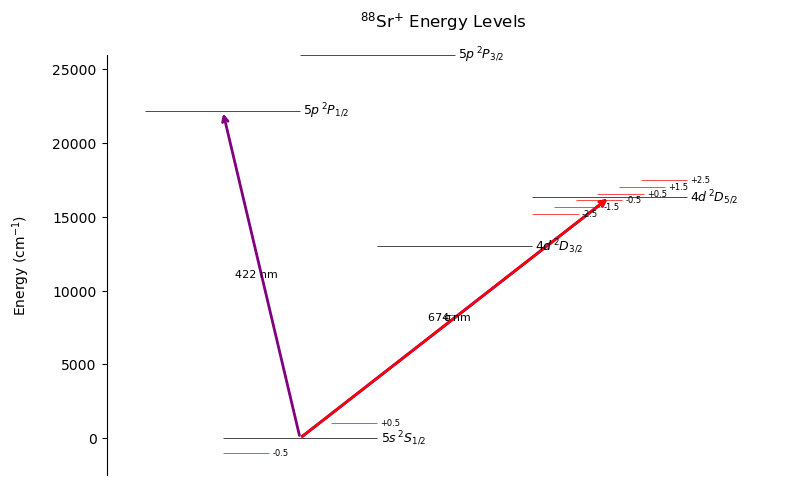

In [26]:
#!/usr/bin/env python3
"""
plot_sr_plus_energy_levels.py

Load Sr⁺ energy‐level data, optionally apply a Zeeman split,
configure layout and style, and plot the level diagram with transitions.
"""

import json
from pathlib import Path
from week3.models import Level
from week3.io import load_ion_data
from week3.splitters import ZeemanSplitter
from week3.layout import LayoutConfig
from week3.style import StyleConfig
from week3.plotter import plot_energy_levels

def main():
    # ─── 1) Load the raw JSON file into our data structure ────────────────────
    # The JSON must contain keys: "ion", "unit", "levels", and optional "transitions".
    # Each level entry is passed through Level(**entry) to create Level objects.
    data_path = Path("week3/test.json")
    raw = json.loads(data_path.read_text())
    levels = [Level(**entry) for entry in raw["levels"]]
    data = {
        "ion":         raw.get("ion", ""),
        "unit":        raw.get("unit", "cm⁻¹"),
        "levels":      levels,
        "transitions": raw.get("transitions", []),
    }

    # ─── 2) (Optional) Apply a small Zeeman splitting to the levels ───────────
    # This will take each Level and produce sub‐levels with m‐quantum ticks.
    zs = ZeemanSplitter(B=0.01)  # magnetic field strength in Tesla
    split_levels = []
    for lvl in data["levels"]:
        # keep the original level...
        split_levels.append(lvl)
        # ...and extend with its Zeeman‐split children
        split_levels.extend(zs.split(lvl))
    data["levels"] = split_levels

    # ─── 3) Build the layout configuration ────────────────────────────────────
    # - column_letters & positions determine horizontal grouping (S, P, D, F → columns)
    # - spacing: base horizontal distance between columns
    # - bar_half: half‐width of each energy bar
    # - x_jitter: maximum horizontal jitter for sub‐levels around parent
    # - y_jitter: base vertical jitter for stacking levels
    # - energy_group_key: function to bucket levels into fine‐structure groups
    # - energy_group_y_scale: multiplier for vertical fan of base-level groups
    # - sublevel_y_scale: multiplier for extra vertical separation of sub‐levels
    layout = LayoutConfig(
        column_letters        = ["S", "P", "D", "F"],
        column_positions      = [0, 0, 1, 3],
        spacing               = 1.5,
        bar_half              = 0.5,
        x_jitter              = 0.2,
        y_jitter              = 50.0,
        energy_group_key      = lambda lvl: int(lvl.energy // 10000),
        energy_group_y_scale  = 30,
        sublevel_y_scale      = 20,
    )

    # ─── 4) Build the style configuration ─────────────────────────────────────
    # StyleConfig defines colors, line widths, tick sizes, etc.
    style = StyleConfig()

    # ─── 5) Plot the diagram ──────────────────────────────────────────────────
    # - data: contains ion name, unit, levels, transitions
    # - layout: controls bar/tick placement
    # - style: controls colors and line widths
    # - show_axis=True draws the y‐axis; set to False to hide it
    plot_energy_levels(data, layout, style, show_axis=True)

if __name__ == "__main__":
    main()


In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from week3.io        import load_ion_data
from week3.splitters import ZeemanSplitter

data = load_ion_data("week3/test.json")
levels = data["levels"]
zs     = ZeemanSplitter(B=0.01)

all_lvls = []
for lvl in levels:
    all_lvls.append(lvl)
    all_lvls.extend(zs.split(lvl))

for lvl in all_lvls:
    print(f"sublevel={lvl.sublevel} | {lvl.label} | E={lvl.energy:.4f}")


sublevel=0 | 5s  2S1/2 | E=0.0000
sublevel=1 | 5s  2S1/2, m=-0.5 | E=-46.6864
sublevel=1 | 5s  2S1/2, m=+0.5 | E=46.6864
sublevel=0 | 5p  2P1/2 | E=23700.0000
sublevel=0 | 5p  2P3/2 | E=24510.0000
sublevel=0 | 4d  2D3/2 | E=14534.0000
sublevel=0 | 4d  2D5/2 | E=14844.0000
sublevel=1 | 4d  2D5/2, m=-2.5 | E=14703.9407
sublevel=1 | 4d  2D5/2, m=-1.5 | E=14759.9644
sublevel=1 | 4d  2D5/2, m=-0.5 | E=14815.9881
sublevel=1 | 4d  2D5/2, m=+0.5 | E=14872.0119
sublevel=1 | 4d  2D5/2, m=+1.5 | E=14928.0356
sublevel=1 | 4d  2D5/2, m=+2.5 | E=14984.0593


In [7]:
for lvl in all_lvls:
    print(lvl)

Level(label='5s  2S1/2', energy=0.0, zeeman=True, sublevel=0, parent=None, split_type=None, children=[Level(label='5s  2S1/2, m=-0.5', energy=np.float64(-46.686447719298215), zeeman=False, sublevel=1, parent=..., split_type='zeeman', children=[]), Level(label='5s  2S1/2, m=+0.5', energy=np.float64(46.686447719298215), zeeman=False, sublevel=1, parent=..., split_type='zeeman', children=[])])
Level(label='5s  2S1/2, m=-0.5', energy=np.float64(-46.686447719298215), zeeman=False, sublevel=1, parent=Level(label='5s  2S1/2', energy=0.0, zeeman=True, sublevel=0, parent=None, split_type=None, children=[..., Level(label='5s  2S1/2, m=+0.5', energy=np.float64(46.686447719298215), zeeman=False, sublevel=1, parent=..., split_type='zeeman', children=[])]), split_type='zeeman', children=[])
Level(label='5s  2S1/2, m=+0.5', energy=np.float64(46.686447719298215), zeeman=False, sublevel=1, parent=Level(label='5s  2S1/2', energy=0.0, zeeman=True, sublevel=0, parent=None, split_type=None, children=[Level

x_map= {'5s  2S1/2': 0.5, '5p  2P1/2': 1.0, '5p  2P3/2': 1.0, '4d  2D3/2': 1.5, '4d  2D5/2': 1.5, '5s  2S1/2, m=-0.5': np.float64(0.43), '5s  2S1/2, m=+0.5': np.float64(0.5700000000000001), '4d  2D5/2, m=-2.5': np.float64(1.43), '4d  2D5/2, m=-1.5': np.float64(1.458), '4d  2D5/2, m=-0.5': np.float64(1.486), '4d  2D5/2, m=+0.5': np.float64(1.514), '4d  2D5/2, m=+1.5': np.float64(1.542), '4d  2D5/2, m=+2.5': np.float64(1.57)}
y_map= {'5s  2S1/2': 0.0, '5p  2P1/2': 23700.0, '5p  2P3/2': 24510.0, '4d  2D3/2': 14534.0, '4d  2D5/2': 14844.0, '5s  2S1/2, m=-0.5': np.float64(-20000.0), '5s  2S1/2, m=+0.5': np.float64(20000.0), '4d  2D5/2, m=-2.5': np.float64(-5296.059343157895), '4d  2D5/2, m=-1.5': np.float64(2759.9643941052636), '4d  2D5/2, m=-0.5': np.float64(10815.988131368422), '4d  2D5/2, m=+0.5': np.float64(18872.011868631576), '4d  2D5/2, m=+1.5': np.float64(26928.035605894736), '4d  2D5/2, m=+2.5': np.float64(34984.0593431579)}
Drawing base-bar for 5s  2S1/2 at 0.5 0.0
Drawing base-ba

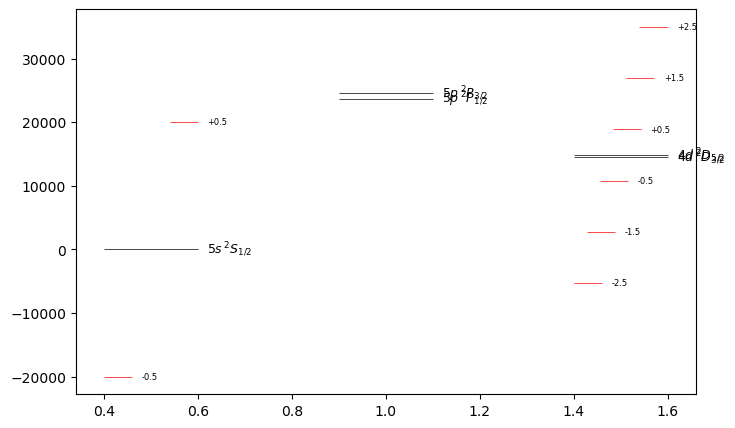

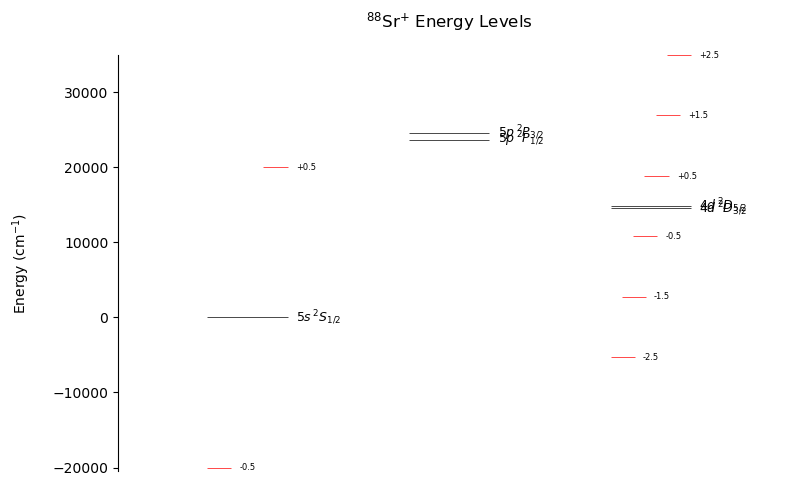

In [8]:
from week3.io        import load_ion_data
from week3.splitters import ZeemanSplitter
from week3.style     import StyleConfig
from week3.layout    import LayoutConfig
from week3.plotter   import plot_energy_levels

# 1) load + split
data = load_ion_data("week3/test.json")
levels0 = data["levels"]
zs      = ZeemanSplitter(B=0.01)

all_lvls = []
for lvl in levels0:
    all_lvls.append(lvl)
    all_lvls.extend(zs.split(lvl))

# 2) configs – note we now supply both letters and integer positions
layout = LayoutConfig(
    column_letters   = ["S", "P", "D", "F"],    # the term‐symbol letters
    column_positions = [1,    2,    3,    4],   # the integer column each letter maps to
    spacing          = 0.5,
    bar_half         = 0.1,
    x_jitter         = 0.2,
    y_jitter         = 20000.0
)

from week3.layout import compute_x_map, compute_y_map
style = StyleConfig()
# after splitting
x_map = compute_x_map(all_lvls, layout, style)
y_map = compute_y_map(all_lvls, layout)
print("x_map=", x_map)
print("y_map=", y_map)
from week3.plotter import draw_levels, draw_transitions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5))
draw_levels(ax, all_lvls, x_map, y_map, layout, style)
draw_transitions(ax, [], x_map, y_map)
# …


style = StyleConfig()  # your default colors, line‐widths, etc.

# 3) plot
data = {
    "ion":        "88Sr+",
    "levels":     all_lvls,
    "transitions":[]
}

plot_energy_levels(data, layout, style)
